# **Udacity: Introduction to TensorFlow for Deep learning**

## Lesson 6
In this lesson, i'll learn to use tensorflow hub, to download pre-trained models and then re-apply them to solve a different problem.

Concepts introduced
- Transfer learning with tensorflow hub
- Making model predictions with pre-trained models


[Tensorflow Hub](https://tfhub.dev/) is a library of pre-trained models which can be downloaded and used as is or re-purposed with transfer learning.

## **Import the Dependencies**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pylab as plt
import numpy as np
import PIL.Image as Image
import logging



logger = tf.get_logger()
logger.setLevel(logging.ERROR)


print(tf.__version__)

2.6.0


## **Using Tensorflow hub and MobileNet**


In this section, i will download a pre-trained model from tensorflow_hub, load it into our workspace and make some prediction using the model.   

Some consideration when using pretrained models
- Required Input shape
- Obvious consideration as to what sort of data it has been trained on?
- What does the model try to solve?


For this lesson, the MobileNet v2 model would be used.

### **Exploring TensorFlow Hub**
[Tensorflow hub](https://tfhub.dev/) is a library of pre-trained models.
You can select models based on
- Problem domain (Text, Image, Video, Audio)
- Model format. Tf.js, TFlite, Coral etc
- Version of tensorflow developed on
- Model Architecture, publisher
- Dataset the model was trained on


## **MobileNet**

[mobilenet](https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4) is trained on the ImageNet Dataset with a MobileNet V2 architecture. This architecture is efficient for on-device image classification and related task.

- It requires an input size of 224x224 pixel.
- Outputs a batch of logits vector, with 1001 class. The class label is found [here](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt)
- The input images are expected to have color values in range of [0, 1].

In [ ]:
# Download the MobileNet Classifer
CLASSIFIER_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
IMG_RES = 224

model = tf.keras.Sequential([
        hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMG_RES, IMG_RES, 3))
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


## **Making Prediction using MobileNet**

In [ ]:
grace_hopper = tf.keras.utils.get_file('image.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')

# looking at the docs, tf.keras.utils.get_file returns a path to the downloaded file.

print(grace_hopper)
print(type(grace_hopper))

/root/.keras/datasets/image.jpg
<class 'str'>


In [ ]:
grace_hopper = Image.open(grace_hopper).resize((IMG_RES, IMG_RES))

print(grace_hopper)
print(type(grace_hopper))

<PIL.Image.Image image mode=RGB size=224x224 at 0x7FA01497CC50>
<class 'PIL.Image.Image'>


In [ ]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

Models, always require a batch of images to process, so we add a batch dimension to the image before making a prediction

In [ ]:
result = model.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

Recap that the output of mobileNet is 1001 class, so the predicted class is the class with the highest probability.

In [ ]:
# get the index of the highest probability.
predicted_class = np.argmax(result[0], axis=-1)
print(predicted_class)

653


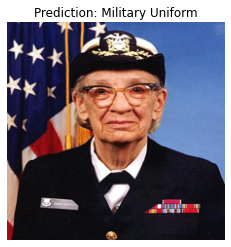

In [ ]:
# download the ImageNet label


labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: "+ predicted_class_name.title())

## **Make prediction on the Cats and Dog Dataset**

In [ ]:
# Download the Cats and Dogs dataset using tensorflow_datasets libraru
(train_examples, validation_examples), info = tfds.load('cats_vs_dogs',
                                                        with_info=True,
                                                        as_supervised=True,
                                                        split=['train[:80%]', 'train[80%:]'])

print(info)
print(type(train_examples))
print(type(validation_examples))

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

In [ ]:
# display the number of training samples
num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

print('Number of training samples: {}'.format(num_examples))
print('Number of training classes: {}'.format(num_classes))

Number of training samples: 23262
Number of training classes: 2


In [ ]:
# the return value of tensorflow_datasets.loads function is a Tensorflow PrefetchDataset

for i, example_image in enumerate(train_examples.take(3)):
  print("Image {} and shape: {}".format(i+1, example_image[0].shape))

Image 1 and shape: (262, 350, 3)
Image 2 and shape: (409, 336, 3)
Image 3 and shape: (493, 500, 3)


Investigating output from Tensorflow PrefetchDataset

In [ ]:
for example_image in train_examples.take(1):
  break

# example_image is a tuple of tensors.
# The first tensor contains the actual image itself, along with other metadata
# I'm not really sure what the purpose of the second tensor is.
print(example_image)


(<tf.Tensor: shape=(262, 350, 3), dtype=uint8, numpy=
array([[[242, 248, 248],
        [240, 246, 246],
        [235, 239, 238],
        ...,
        [188, 174, 127],
        [145, 133,  85],
        [161, 149, 101]],

       [[238, 244, 244],
        [239, 245, 245],
        [235, 239, 238],
        ...,
        [188, 176, 128],
        [165, 153, 105],
        [178, 168, 119]],

       [[237, 241, 240],
        [238, 242, 241],
        [232, 236, 235],
        ...,
        [200, 187, 142],
        [201, 191, 142],
        [200, 192, 143]],

       ...,

       [[130, 122,  75],
        [152, 146,  98],
        [154, 148,  98],
        ...,
        [161, 166, 136],
        [ 77,  86,  57],
        [ 71,  82,  52]],

       [[167, 159, 112],
        [105,  99,  51],
        [148, 142,  92],
        ...,
        [ 67,  73,  45],
        [ 46,  56,  29],
        [ 41,  54,  26]],

       [[138, 130,  83],
        [ 83,  77,  29],
        [135, 129,  79],
        ...,
        [ 68,  74,  

In [ ]:
print(example_image[0])

tf.Tensor(
[[[242 248 248]
  [240 246 246]
  [235 239 238]
  ...
  [188 174 127]
  [145 133  85]
  [161 149 101]]

 [[238 244 244]
  [239 245 245]
  [235 239 238]
  ...
  [188 176 128]
  [165 153 105]
  [178 168 119]]

 [[237 241 240]
  [238 242 241]
  [232 236 235]
  ...
  [200 187 142]
  [201 191 142]
  [200 192 143]]

 ...

 [[130 122  75]
  [152 146  98]
  [154 148  98]
  ...
  [161 166 136]
  [ 77  86  57]
  [ 71  82  52]]

 [[167 159 112]
  [105  99  51]
  [148 142  92]
  ...
  [ 67  73  45]
  [ 46  56  29]
  [ 41  54  26]]

 [[138 130  83]
  [ 83  77  29]
  [135 129  79]
  ...
  [ 68  74  46]
  [ 14  27   1]
  [ 63  77  51]]], shape=(262, 350, 3), dtype=uint8)


In [ ]:
print(example_image[1])

tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
# The images in the cats and dogs dataset are of different size so we need to resize it to match the expected input (224, 224) for the MobileNet classifier. Last time we used the .flow from directory function to resize all the images.

for index, cats_dogs_data in enumerate(train_examples.take(3)):
  print('Image {} and shape {}'.format(index+1, cats_dogs_data[0].shape))

Image 1 and shape (262, 350, 3)
Image 2 and shape (409, 336, 3)
Image 3 and shape (493, 500, 3)


In [ ]:
def format_image(image, label):
  # resize to 224x224 and also normalize to a range of 0-1
  image = tf.image.resize(image, (IMG_RES, IMG_RES))/255.0
  return image, label

BATCH_SIZE = 32

# Create a batched dataset for training and validation
train_batches = train_examples.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)


Make prediction using the batched dataset

In [ ]:
image_batch, label_batch = next(iter(train_batches.take(1)))

# currently both the image_batch and label_batch are tensorflow prefetched datasets objects

# convert to a numpy array
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

print(image_batch)
print(type(image_batch))
print(label_batch)
print(type(label_batch))

[[[[3.81652653e-01 4.91456568e-01 5.77731073e-01]
   [3.75070035e-01 4.84873950e-01 5.71148455e-01]
   [3.77197146e-01 4.87001061e-01 5.73275506e-01]
   ...
   [1.27394363e-01 1.23472795e-01 2.34880969e-02]
   [2.21120998e-01 2.17199430e-01 1.07395500e-01]
   [2.55452663e-01 2.51531094e-01 1.41727179e-01]]

  [[3.88095230e-01 4.97899175e-01 5.84173620e-01]
   [3.90470564e-01 5.00274479e-01 5.86548984e-01]
   [4.01142001e-01 5.10945976e-01 5.97220480e-01]
   ...
   [8.63288715e-02 7.10627660e-02 6.09784760e-03]
   [2.48359233e-01 2.33093128e-01 1.34633735e-01]
   [3.56346786e-01 3.41080666e-01 2.42621303e-01]]

  [[3.82351398e-01 4.92155313e-01 5.83191752e-01]
   [3.96861523e-01 5.06665468e-01 5.97701907e-01]
   [4.19126421e-01 5.28930306e-01 6.19966745e-01]
   ...
   [1.70068726e-01 1.50801390e-01 6.72148913e-02]
   [3.14597696e-01 2.95502275e-01 2.10868523e-01]
   [2.42535591e-01 2.23612130e-01 1.37931123e-01]]

  ...

  [[2.52099633e-01 1.73668265e-01 1.81511402e-01]
   [2.64001071e-

In [ ]:
# Make a prediction using the pre-trained model
result_batch = model.predict(image_batch)

# model prediction output is a numpy array with a shape of 32, 1001
# 32 rows (samples) and 1001 columns for the class probablity
print(result_batch)
print(result_batch.shape)

[[ 0.23487392 -0.56116074  0.14765085 ... -0.20621157  0.510321
   2.5731726 ]
 [ 0.3089399   0.59598196  0.35409606 ...  0.16895324  0.6958691
   0.4313621 ]
 [ 0.34464654 -0.07599223  0.22748633 ... -0.7179726   0.9313835
   2.29761   ]
 ...
 [ 0.1732201  -0.57884717  0.30632168 ... -0.56358427 -1.0352418
   0.3641255 ]
 [ 0.28643063 -1.1541783  -0.8212795  ... -0.42147785  0.92384386
   0.784611  ]
 [ 0.19508207  0.3605743  -0.24568057 ... -0.2760589  -0.9062118
   0.8568305 ]]
(32, 1001)


In [ ]:
# get imagenet class label

predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
print(predicted_class_names)

['Egyptian cat' 'Tibetan mastiff' 'Angora'
 'American Staffordshire terrier' 'Labrador retriever' 'tabby' 'whippet'
 'schipperke' 'tabby' 'cocker spaniel' 'tabby' 'tabby' 'Egyptian cat'
 'Brabancon griffon' 'kelpie' 'Persian cat' 'miniature poodle'
 'groenendael' 'Siberian husky' 'dingo' 'tabby' 'Siamese cat'
 'Labrador retriever' 'Egyptian cat' 'Egyptian cat' 'tabby' 'tabby'
 'Angora' 'lynx' 'Irish wolfhound' 'Yorkshire terrier'
 'American Staffordshire terrier']


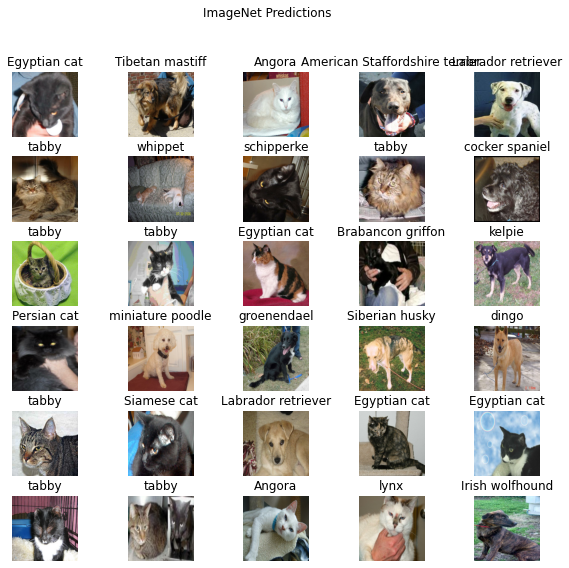

In [ ]:
# display the images alongside the predicted labels

plt.figure(figsize=(10, 9))
for n in range(30):
  plt.subplot(6, 5, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle('ImageNet Predictions')

The model predicted the breed for both the dogs and cat. So it's classification is one lvl higher. Note that there was a misclassification with the label.

Misclassification in the sense that it predicted dishwasher for one of the images containing a cat and a dishwasher, so it is still correct.

## **Transfer Learning with MobileNet and Cats vs Dog Dataset**

So far we have 
- Demonstrated how to download a model from tensorflow hub and then use it to make predictions
- We've made predictions on a single image and have made predictions using the Cats and Dogs datasets.

\
*I wonder*   
Is there a way to determine the performance of the MobileNet on the cats and dog dataset without transfer learning?   
- I'm not sure. To assess it's performance we would have to get it's prediction and then check it against the actual label.
- But without transfer learning, the model would predict 1001 class and we only have 2 class for the cats v dog dataset, so how would we assess it's predictions?

\
Possible alternative would be to somehow encode the labels for the imagenet dataset to match the labels for cats and dogs. But then you no longer have a binary label you would have
- Not cat or dog
- Cat
- Dog

\
:sigh: it would be better to just do transfer learning.

### **Transfer Learning**
With transfer learning, we are applying a pre-trained model to solve a different problem.
We do this by
- freezing the hidden layer (weights and bias)
- adding a new final layer or several layer and then retraining the new layer on our own dataset.

*Worth noting* that tensorflow hub contains both complete models and models without the last classification layer.


**feature extractors**   
Partial models (models without classification layers) are called feature_extractors. As it would take the input from the input layer all the way to layer containing different feature. Leaving us with the task of creating the final probability distribution, from the extracted features.

In [ ]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMG_RES, IMG_RES, 3))


In [ ]:
# Apply a batch of training samples to the feature_extractor
# The last layer has: 1280 neurons. Recap that a batch contains 32 images

feature_batch = feature_extractor(image_batch)
print(feature_batch.shape)

(32, 1280)


In [ ]:
# freeze the parameters of the feature extractor layer, so that it remains unchanged during training
feature_extractor.trainable = False


In [ ]:
# i wonder

try:
  feature_extractor.summary()
except:
  print("Nope that's a no no")

Nope that's a no no


Create the model to train

In [ ]:
MobileNet_on_Cats_and_Dogs = tf.keras.Sequential([
                             feature_extractor,
                             tf.keras.layers.Dense(units=2)
])

MobileNet_on_Cats_and_Dogs.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
MobileNet_on_Cats_and_Dogs.compile(optimizer='adam',
                                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                   metrics=['accuracy'])

EPOCHS = 6
model_history = MobileNet_on_Cats_and_Dogs.fit(train_batches,
                                               epochs=EPOCHS,
                                               validation_data=validation_batches)

Epoch 1/6
582/582 [==============================] - 74s 114ms/step - loss: 0.0544 - accuracy: 0.9817 - val_loss: 0.0340 - val_accuracy: 0.9893
Epoch 2/6
582/582 [==============================] - 61s 96ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0330 - val_accuracy: 0.9895
Epoch 3/6
582/582 [==============================] - 60s 96ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0318 - val_accuracy: 0.9897
Epoch 4/6
582/582 [==============================] - 61s 96ms/step - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.0312 - val_accuracy: 0.9899
Epoch 5/6
582/582 [==============================] - 61s 96ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0325 - val_accuracy: 0.9903
Epoch 6/6
582/582 [==============================] - 61s 96ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0342 - val_accuracy: 0.9897


Error Note:
- Used a sigmoid activation function for the last layer
- Used a loss of tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Error message:
UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '

Text(0.5, 0.98, 'Model Training History')

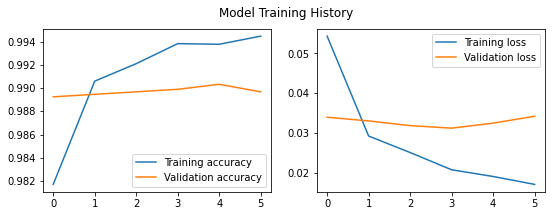

In [ ]:
# plot models performance over the different range of epochs

EPOCHS_range = range(len(model_history.history['accuracy']))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (9, 3), sharex=True, sharey=False)

# Plot training and validation accuracy
ax1.plot(EPOCHS_range, model_history.history['accuracy'], label='Training accuracy')
ax1.plot(EPOCHS_range, model_history.history['val_accuracy'], label='Validation accuracy')
ax1.legend()

# Plot training and validation loss
ax2.plot(EPOCHS_range, model_history.history['loss'], label='Training loss')
ax2.plot(EPOCHS_range, model_history.history['val_loss'], label='Validation loss')
ax2.legend()

fig.suptitle('Model Training History')

In [ ]:
print('Model Final performance')
print('Training Accuracy: {:.2f} and Training loss: {:.2f}'.format(model_history.history['accuracy'][-1], model_history.history['loss'][-1]))
print('Validation Accuracy: {:.2f} and Training loss: {:.2f}'.format(model_history.history['val_accuracy'][-1], model_history.history['val_loss'][-1]))


Model Final performance
Training Accuracy: 0.99 and Training loss: 0.02
Validation Accuracy: 0.99 and Training loss: 0.03


Wow i wasn't expected that at all. An accuracy of 99% on both training and validation, with an even smaller loss.


#### **Note on model performance**
(Well at least in the lesson note)   
The model performs much better on the validation set, than it does on the training set. The reason for this is
- Validation performance is measured at the end of the epoch, will the training performance is the avergae across the epoch.

\
**What i don't get**   
While doing training, the mode performances image augmentation on the training images, but not on the validation dataset. So the model finds it harder to classify images in the training set than it does on the normal validation set.


### **Check the model's prediction**

In [ ]:
class_names = np.array(info.features['label'].names)
print(class_names)

['cat' 'dog']


In [ ]:
# make prediction using image_batch

predicted_batch = MobileNet_on_Cats_and_Dogs.predict(image_batch)

print(predicted_batch)
print(predicted_batch.shape)

[[ 5.889628  -5.614261 ]
 [-7.5947185  6.493016 ]
 [ 7.0955625 -6.6559334]
 [-6.559216   6.8041973]
 [-6.075223   6.833342 ]
 [ 5.9168763 -4.7767916]
 [ 1.2562579  0.6923744]
 [ 3.9396167 -3.8534431]
 [ 4.97041   -4.212027 ]
 [-2.950279   3.954819 ]
 [ 5.393643  -5.988447 ]
 [ 6.6228976 -6.4084735]
 [ 5.7418737 -5.706444 ]
 [ 2.39035   -1.8413811]
 [-4.3916078  4.6955376]
 [ 7.002051  -4.6818275]
 [-3.2250564  3.5584636]
 [-3.54879    4.0727367]
 [-3.5614214  4.3265295]
 [-3.5367756  3.7737513]
 [ 5.4531345 -4.409    ]
 [ 7.8888044 -7.7806015]
 [-3.3115585  3.9999907]
 [ 5.330819  -5.0432324]
 [ 5.7808857 -5.783441 ]
 [ 5.9396195 -5.345472 ]
 [ 8.028503  -6.4750876]
 [ 3.9160404 -5.04407  ]
 [ 6.71153   -6.6366816]
 [-5.372987   5.3479004]
 [-3.48891    3.4770024]
 [-6.829275   6.3208313]]
(32, 2)


In [ ]:
predicted_batch = tf.squeeze(predicted_batch).numpy() # TODO: What does this line do?

predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

array(['cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat',
       'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog',
       'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'dog', 'dog', 'dog'], dtype='<U3')

In [ ]:
print("Labels: ", label_batch)
print("Predicted Labels: ", predicted_ids)


Labels:  [0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1]
Predicted Labels:  [0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1]


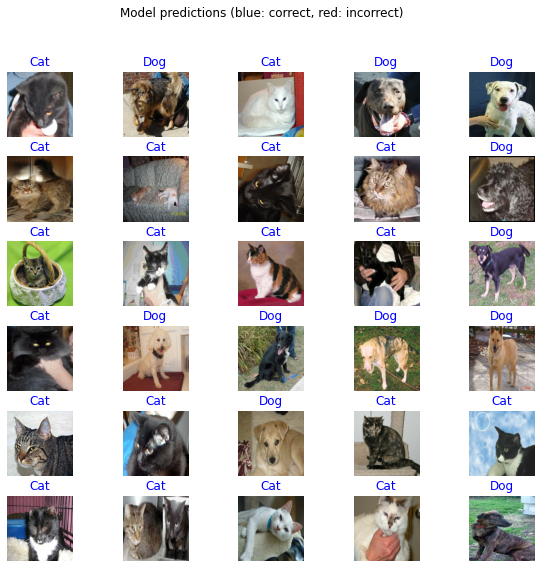

In [ ]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")